In [2]:
from utils import *

# Basic properties of Hermite polynomials 

We use the recursive Hermite polynomial defintion 
$$
He_0(x)=1, \qquad He_1(x)=x, \qquad He_k(x) = x He_{k-1}(x) - (k-1) He_{k-2}(x)
$$
and normalized Hermite 
$$
he_k(x) = \frac{1}{\sqrt{k!}}He_k(x) 
$$
**Orthogonality of Hermite polynomials:**
$$
E_{X\sim N(0,1)} [He_k(X) He_l(x)]= k! \delta_{kl},\qquad 
E_{X\sim N(0,1)} [he_k(X) he_l(x)]= \delta_{kl}
$$
where $\delta$ is Dirac delta, and also its normalized version. 

*Expansion in Hermite basis:* Based on orthognoality, we can expand in the normalized basis as 
$$
f(x) = \sum_{k=0}^\infty c_k he_k(x), \qquad c_k = E_{X\sim N(0,1)}f(X)he_k(X)
$$
and not normalized basis as 
$$
f(x) = \sum_{k=0}^\infty c_k He_k(x), \qquad c_k = \frac{1}{k!} E_{X\sim N(0,1)}f(X)He_k(X) 
$$



**Kernel map**
If $X,Y$ are standard Gaussian with covariance $\rho,$ we define the kernel map $f$, as 
$$
\kappa_f(\rho) := E_{X,Y} f(X)f(Y) X,Y\sim N(0,1), E XY=\rho
$$
- Thus, in the normalized Hermite basis we have
$$
\kappa_f(\rho)=\sum_{k=0}^\infty c_k^2 \rho^k, \qquad f(x)=\sum_{k=0}^\infty c_k he_k(x), 
$$
- and in the un-normalized basis we have
$$
\Kappa_f(\rho) = \sum_{k=0}^\infty  k! c_k^2 \rho^k, \qquad f(x)=\sum_{k=0}^\infty c_k He_k(x)
$$
Basic properties of kernel map:
- in the normalized basis we have
$$
E f(X) = c_0 = \sqrt{\kappa(0)}, \qquad E f(X)^2 = \sum_{k=0}^\infty c_k^2 = \kappa(1),  
$$
- and for unnormalized basis:
$$
E f(X) = c_0 = \sqrt{\Kappa(0)}, \qquad E f(X)^2 = \sum_{k=0}^\infty k! c_k^2 = \Kappa(1)
$$


**Derivative**
A fact is thta $He_k'(x)=k He_{k-1}(x),$ and consequently $he'_{k}(x) = \sqrt{k} he_{k-1}(x)$.
As a consequence, 
The kernel map of derivative of $f$ is derivative of kernel map of $f$, defined as 
$$
\kappa_{f'}(\rho)=E (f'(X))(f'(Y)) , \qquad X,Y\sim N(0,1), E XY=\rho
$$
can be written in the normalized basis as:
$$
\kappa_{f'}(\rho)= \sum_{k=1}^\infty k c_k^2 \rho^{k-1},  \qquad f(x) = \sum_{k=0}^\infty c_k he_k(x)
$$
and in the un-normalized basis as
$$
\kappa_{f'}(\rho) = \sum_{k=1}k! c_k^2 \rho^{k-1}, \qquad f(x)=\sum_{k=0}^\infty c_k He_k(x)
$$

**Remark** In both cases, the kernel map of derivative is equal to derivative of kernel map:
$$
 \kappa_{f'}(\rho) = \kappa'_f(\rho)
$$

# Tests 

Testing orthogonality of normalized Hermite polynomials (he(x))
 E [he_0(X) he_0(X)], theory = 1.0000, emp =  1.0000, error = 0.0000
 E [he_0(X) he_1(X)], theory = 0.0000, emp =  0.0003, error = 0.0003
 E [he_0(X) he_2(X)], theory = 0.0000, emp =  0.0002, error = 0.0002
 E [he_0(X) he_3(X)], theory = 0.0000, emp =  -0.0000, error = 0.0000
 E [he_1(X) he_1(X)], theory = 1.0000, emp =  1.0003, error = 0.0003
 E [he_1(X) he_2(X)], theory = 0.0000, emp =  0.0004, error = 0.0004
 E [he_1(X) he_3(X)], theory = 0.0000, emp =  -0.0006, error = 0.0006
 E [he_2(X) he_2(X)], theory = 1.0000, emp =  0.9995, error = 0.0005
 E [he_2(X) he_3(X)], theory = 0.0000, emp =  0.0012, error = 0.0012
 E [he_3(X) he_3(X)], theory = 1.0000, emp =  0.9956, error = 0.0044
Testing orthogonality of  Hermite polynomials (He(x))
 E [He_0(X) He_0(X)], theory = 1.0000, emp =  1.0000, error = 0.0000
 E [He_0(X) He_1(X)], theory = 0.0000, emp =  0.0003, error = 0.0003
 E [He_0(X) He_2(X)], theory = 0.0000, emp =  0.0003

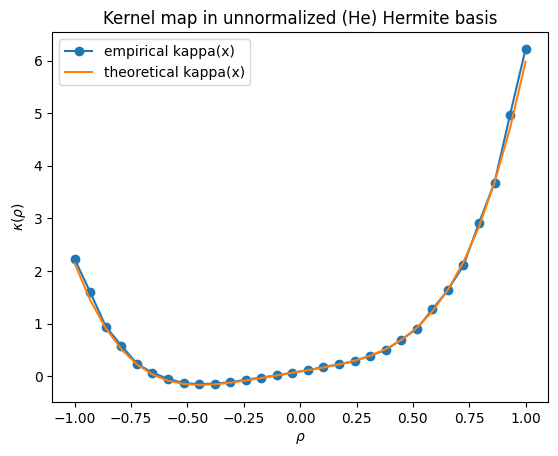

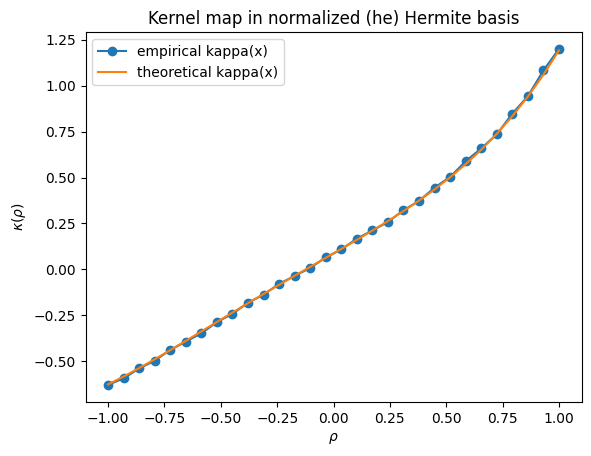

In [3]:

coefs = np.random.randn(4)
test_orthogonality(K=4)
test_recovery(coefs)

coefs = np.random.randn(5)
print(f"testing $f(x) ={''.join(f'{' +' if c>=0 else ' -'}{abs(c):.1f} He_{i}(x)' for i,c in enumerate(coefs))}$")
test_kernel_map_from_coefs(coefs, norm=False)
test_kernel_map_properties_from_coefs(coefs, norm=False)
print(f"testing $f(x) ={''.join(f'{' +' if c>=0 else ' -'}{abs(c):.1f} he_{i}(x)' for i,c in enumerate(coefs))}$")
test_kernel_map_from_coefs(coefs, norm=True)
test_kernel_map_properties_from_coefs(coefs, norm=True)


# Fixed points and convergence of neural kernel 

f(x)= +0.0 he_0(x) +0.4 he_1(x) +0.9 he_2(x)
k(0) = 0.0000, k'(1) = 1.8351, k'(rho*) = 0.1649, k'(0) = 0.1649
case 1
f(x)= +0.8 he_0(x) -0.2 he_1(x) +0.6 he_2(x)
k(0) = 0.6282, k'(1) = 0.6923, k'(rho*) = 0.6923, k'(0) = 0.0513
case 2
f(x)= +0.7 he_0(x) +0.0 he_1(x) +0.7 he_2(x)
k(0) = 0.5000, k'(1) = 1.0000, k'(rho*) = 0.9955, k'(0) = 0.0000
case 3
f(x)= +0.4 he_0(x) +0.4 he_1(x) +0.8 he_2(x)
k(0) = 0.1667, k'(1) = 1.5000, k'(rho*) = 0.5000, k'(0) = 0.1667
case 4


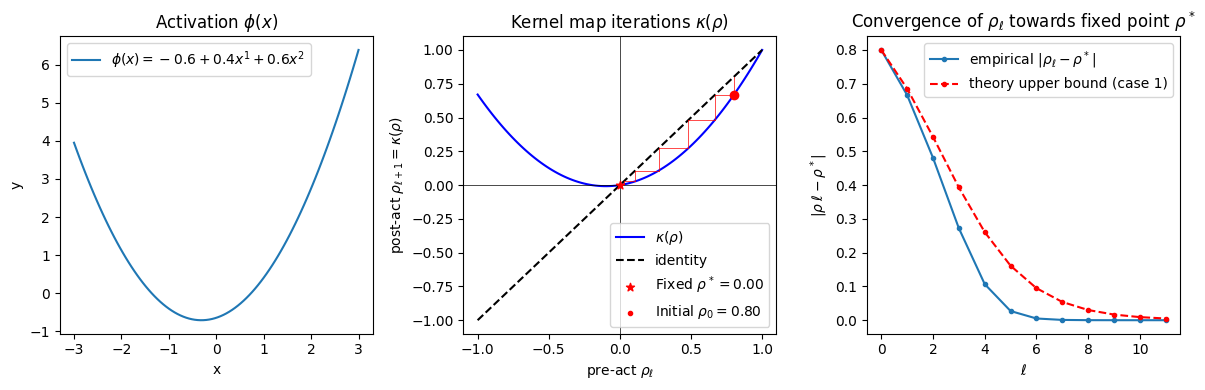

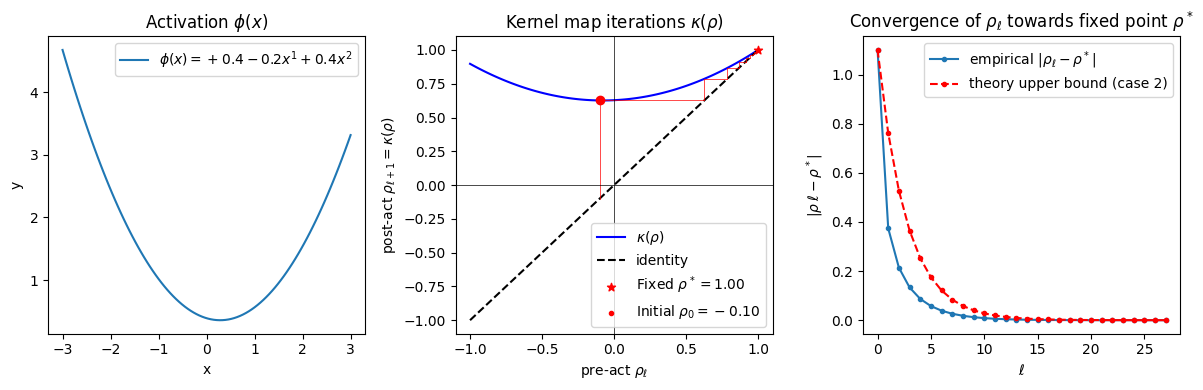

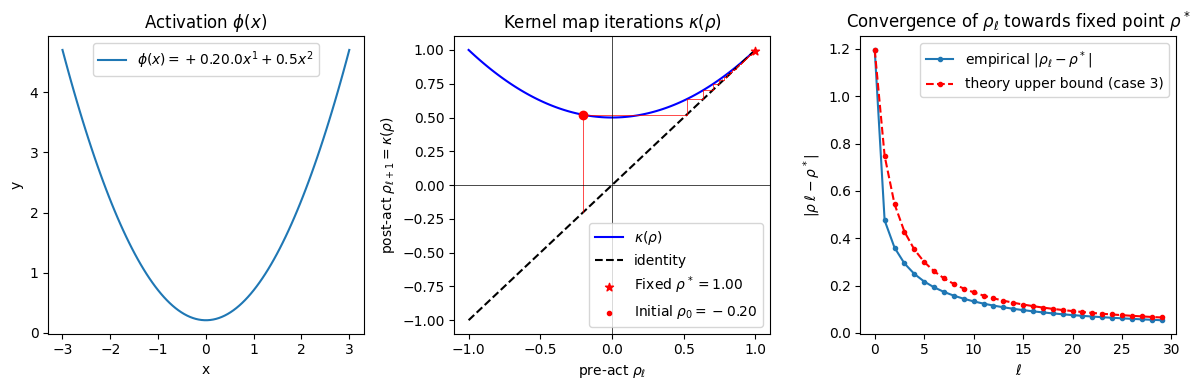

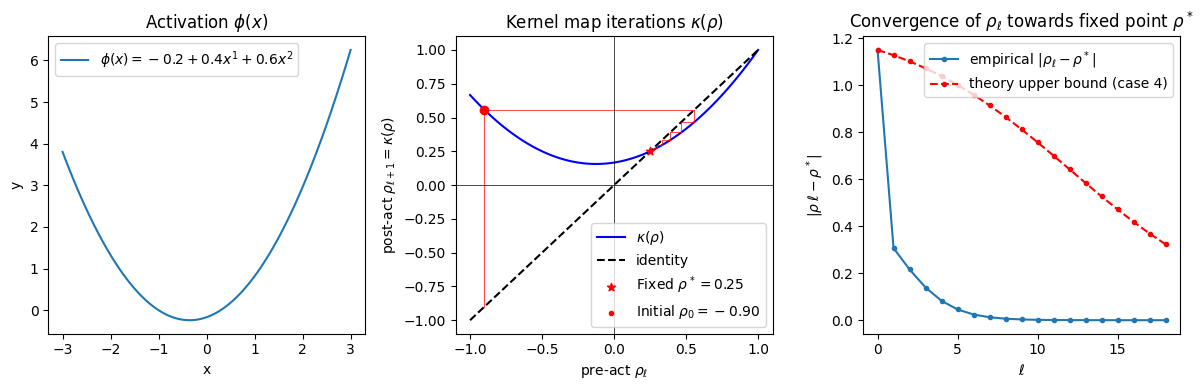

In [275]:
all_coefs = [(.8, [0,.4,.9,]),(-.1, [.7,-.2, .5, ]), (-.2,[1,0,1]), (-.9,[.5, .5, 1.,])]
coefs = np.array([1,0,1])
rho0=np.random.rand()*2-1
coefs = np.random.randn(3)
if np.random.rand()<0.2:
    coefs[0] = 0
for n in range(4):
    rho0, coefs = all_coefs[n]
    coefs = np.array(coefs)
    coefs = coefs / np.sum(coefs**2)**0.5
    f, poly_coefs = hermite_expansion(coefs, return_coefs=True)

    act_name = coefs2name(poly_coefs)
    print(f"f(x)={''.join(f'{' +' if c>=0 else ' -'}{abs(c):.1f} he_{i}(x)' for i,c in enumerate(coefs))}")

    kernel_name = coefs2kernel_name(coefs)
    kernel_name = '\\kappa(\\rho)'

    kappa = kernel_map(coefs)
    kappa_prime = kernel_map(coefs,1)

    plt.figure(figsize=(12,4))
    plt.subplot(1, 3, 1)
    plot_activation(f, act_name)
    plt.tight_layout()
    plt.subplot(1, 3, 3)
    convergence_bound(kappa, kappa_prime, rho0, eps=1e-2)
    plt.subplot(1, 3, 2)
    plot_fixed_point_iteration(kappa, rho0, -1,1, kernel_name=kernel_name)
    plt.savefig(f'images/kernel_map_convergence_case_{n}.pdf')

Mean Absolute Error = 0.01438


/var/folders/zn/c_3kf_gx42n9mqlw1f1qh4rc0000gn/T/ipykernel_22278/2086187828.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


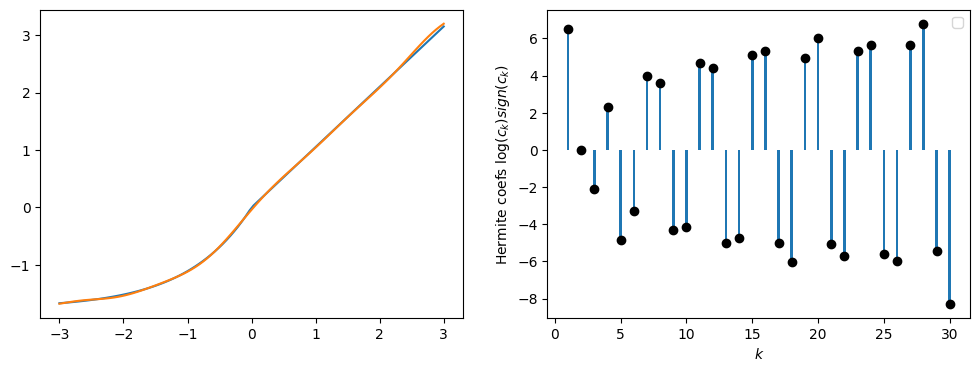

In [223]:

f = get_activation_function('selu',)
coefs = compute_hermite_coefs(f, coefs_len=30,num_samples=10**6)
f2 = hermite_expansion(coefs)
x = np.linspace(-3,3,100)
mae = np.mean(abs(f(x)-f2(x)))
print(f"Mean Absolute Error = {mae:.5f}")

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(x,f(x), label='original')
plt.plot(x,f2(x), label='recovered')
plt.subplot(1,2,2)
sg = np.sign(coefs)
scoefs = np.log(np.abs(coefs)) * sg
plt.bar(range(1,len(coefs)+1),scoefs,width=0.2)
plt.scatter(range(1,len(coefs)+1),scoefs,marker='o',color='k',)
plt.ylabel('Hermite coefs $\\log(c_k) sign(c_k)$')
plt.xlabel('$k$')
plt.legend()

In [5]:
def plot_activation(f, act_name, a=-3,b=3):
    x = np.linspace(a,b,100)
    plt.plot(x,f(x), label=f'${act_name}$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Activation: {act_name}')
    plt.legend()
    plt.tight_layout()

all_coefs = [(-.8, 'tanh'), (-.5, 'relu'), (-.5, 'exp'), (-.8, 'gelu')]
for n in range(4):
    rho0, act_name = all_coefs[n]
    f = get_activation_function(act_name)
    C = np.mean(f(np.random.randn(10**7))**2)**0.5
    coefs = compute_hermite_coefs(f, order=20, num_samples=10**7)
    coefs = coefs / np.sum(coefs**2)**0.5
    f_norm = lambda x: f(x)/C
    act_name = f'\\propto {act_name}(x)'

    # kernel_name = coefs2kernel_name(coefs)
    kernel_name = '\\kappa(\\rho)'

    kappa = kernel_map(coefs)
    kappa_prime = kernel_map(coefs,1)

    plt.figure(figsize=(12,4))
    plt.subplot(1, 3, 1)
    plot_activation(f_norm, act_name=f'{act_name}', a=-3,b=3)
    plt.tight_layout()
    plt.subplot(1, 3, 3)
    convergence_bound(kappa, kappa_prime, rho0, eps=1e-2)
    plt.subplot(1, 3, 2)
    plot_fixed_point_iteration(kappa, rho0, -1,1, kernel_name=kernel_name)
    plt.savefig(f'images/kernel_map_convergence_case_{n}_{act_name}.pdf')

k(0) = 0.0000, k'(1) = 1.1775, k'(rho*) = 0.9305, k'(0) = 0.9305
case 1


# Self-normalizing activations 

We have the multiplication and addition theorem 
$$
\begin{align}
&He_n(x+y) = \sum_{k=0}^n \binom{n}{k}x^{n-k} He_k(y) \\
&He_n(\gamma x) = \sum_{i=0}^{\lfloor \frac{n}{2} \rfloor} \gamma^{n-2i} (\gamma^2 - 1)^i \binom{n}{2i} \frac{(2i)!}{i!} 2^{-i} He_{n-2i}(x).
\end{align}
$$


In [ ]:
from scipy.special import comb, factorial

def he_add_weights(n, gamma):
    # Initialize a vector of length n+1 to store the weights
    weights = np.zeros(n + 1)

    # Iterate over the terms in the sum
    for k in range(n // 2 + 1):
        weights[k] =  comb(n, k) *  x ** (n-k)
    
    return weights

def he_mult_weights(n, gamma):
    # Initialize a vector of length n+1 to store the weights
    weights = np.zeros(n + 1)

    # Iterate over the terms in the sum
    for i in range(n // 2 + 1):
        coeff = (gamma**(n - 2 * i)) * ((gamma**2 - 1)**i) * comb(n, 2 * i) * (factorial(2 * i) / (factorial(i) * 2**i))
        weights[n - 2 * i] += coeff
    
    return weights

# Example usage:
n = 2  # Degree of Hermite polynomial
gamma = 1.5  # Value of gamma
weights = he_mult_weights(n, gamma)
print(f"Weights vector for n={n} and gamma={gamma}:\n", weights)

He = [hermite_poly(k,norm=False) for k in range(n+1)]

x = np.array([1,2,-1,-2])
y = He[n](gamma * x)
y2 = weights @ np.array([He[k](x) for k in range(n+1)])
y, y2

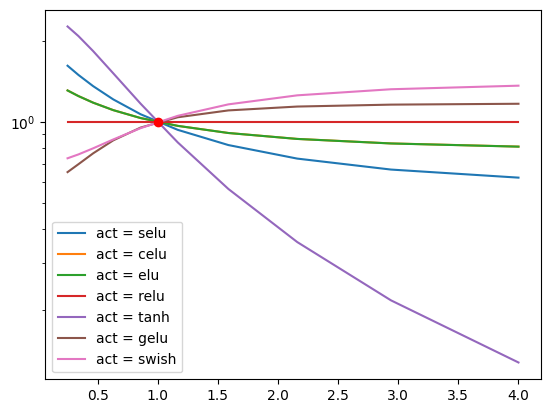

In [435]:
coefs = np.array([4**(-i)*(1 if i%4 in [0,1,] else -1) for i in range(20)])
coefs = coefs / np.sum(coefs**2)**0.5
f = hermite_expansion(coefs)
for act in ['selu', 'celu', 'elu', 'relu', 'tanh','gelu','swish',]:
    f = get_activation_function(act) 
    x = np.linspace(-5,5,100)
    gamma = 2**np.linspace(-2,2,10)
    X = np.random.randn(10**6)
    vals = np.zeros(len(gamma))
    for i,g in enumerate(gamma):
        vals[i] = np.mean(f(g*X)**2)/np.mean(f(X)**2)/g**2
    plt.plot(gamma,vals,label=f'act = {act}')
plt.legend()
plt.plot([1],[1],'ro')
plt.yscale('log')
# np.mean()


tanh: -0.3934
selu: -0.2436
celu: -0.0988
elu: -0.0987
swish: 0.0894
gelu: 0.1069
relu: 0.1465


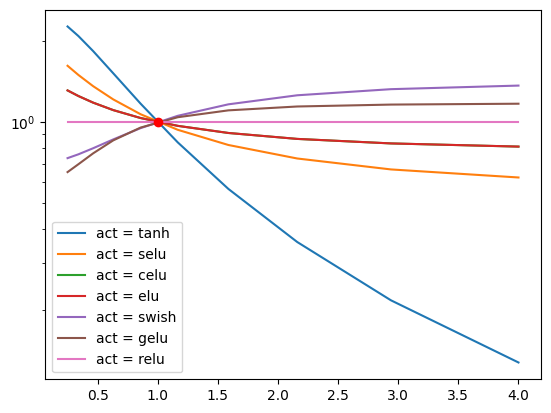

In [24]:
slopes = []
for act in ['selu', 'celu', 'elu', 'relu', 'tanh','gelu','swish',]:
    f = get_activation_function(act)
    coefs = compute_hermite_coefs(f, coefs_len=20,num_samples=10**7,norm=False)
    coefs = coefs / np.sum(coefs**2)**0.5
    coefs2 = coefs_derivative(coefs,2)
    f2 = hermite_expansion(coefs2)
    X = np.random.randn(10**7)
    slopes.append((np.mean(f2(X)*f(X)),act))
slopes = sorted(slopes)
for s,a in slopes:
    print(f'{a}: {s:.4f}')


acts = [a for s,a in slopes]
for act in acts:
    f = get_activation_function(act) 
    x = np.linspace(-5,5,100)
    gamma = 2**np.linspace(-2,2,10)
    X = np.random.randn(10**6)
    vals = np.zeros(len(gamma))
    for i,g in enumerate(gamma):
        vals[i] = np.mean(f(g*X)**2)/np.mean(f(X)**2)/g**2
    plt.plot(gamma,vals,label=f'act = {act}')
plt.legend()
plt.plot([1],[1],'ro')
plt.yscale('log')


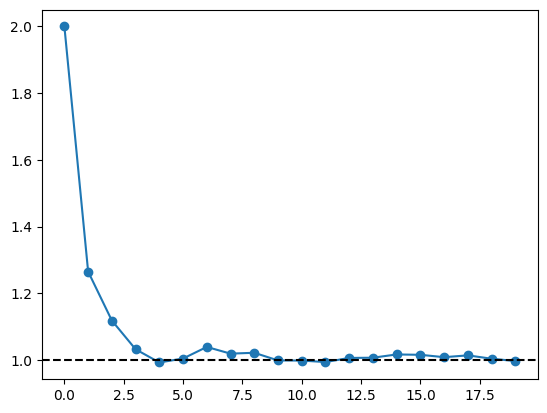

In [434]:
# norm stability 
f = get_activation_function('tanh')
f_norm = np.mean(f(np.random.randn(10**7))**2)
L = 20
gamma = 2
gammas = np.zeros(L)
for l in range(L):
    X = np.random.randn(10**3)
    gammas[l] = gamma
    gamma = (np.mean(f(gamma*X)**2)/f_norm) ** 0.5
plt.plot((gammas),marker='o')
plt.axhline(y=1,color='k',linestyle='--')



# Training 

In [176]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.nn import RMSNorm


# Define the custom activation module
class CustomActivation(nn.Module):
    def __init__(self, activation_fn):
        super(CustomActivation, self).__init__()
        self.activation_fn = activation_fn  # Store the custom activation function

    def forward(self, x):
        return self.activation_fn(x)  # Apply the custom function to the input


# Define the MLP class
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, activation_fn):
        super(MLP, self).__init__()
        layers = []
        layers.append(nn.Linear(input_dim, hidden_dim))
        layers.append(activation_fn)
        for _ in range(num_layers - 1):
            layers.append(nn.Linear(hidden_dim, hidden_dim))
            layers.append(activation_fn)
            layers.append(RMSNorm(hidden_dim))
        layers.append(nn.Linear(hidden_dim, output_dim))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)
    


# Training the model
def train(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images = images.view(-1, 32 * 32 * 3).to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}')
        test(model, test_loader)

# Testing the model
def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(-1, 32 * 32 * 3).to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Test Accuracy: {100 * correct / total:.2f}%')



# Custom activation function (example: Leaky ReLU)
activation_fn = nn.LeakyReLU()

# Hyperparameters
input_dim = 32 * 32 * 3  # CIFAR-10 images are 32x32x3
hidden_dim = 256  # You can change this to your desired hidden dimension
output_dim = 10   # 10 classes in CIFAR-10
num_layers = 30    # You can change the number of hidden layers
num_epochs = 10
batch_size = 50
learning_rate = 0.001

# Data preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize between -1 and 1
])

# Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


def f(x):
    return torch.exp(x) +  x * num_layers**0.5
f = nn.SELU()
activation_fn = CustomActivation(f)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MLP(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers, activation_fn=activation_fn).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)


# Train and test the model
train(model, train_loader, criterion, optimizer, num_epochs)
# test(model, test_loader)


Files already downloaded and verified
Files already downloaded and verified
Epoch [1/10], Loss: 1.8307
Test Accuracy: 38.48%
Epoch [2/10], Loss: 1.7244
Test Accuracy: 39.71%
Epoch [3/10], Loss: 1.6820
Test Accuracy: 40.29%
Epoch [4/10], Loss: 1.6501
Test Accuracy: 41.82%
Epoch [5/10], Loss: 1.6219
Test Accuracy: 41.85%
Epoch [6/10], Loss: 1.5982
Test Accuracy: 41.60%
Epoch [7/10], Loss: 1.5757
Test Accuracy: 43.31%
Epoch [8/10], Loss: 1.5564
Test Accuracy: 43.62%
Epoch [9/10], Loss: 1.5382
Test Accuracy: 44.66%
Epoch [10/10], Loss: 1.5187
Test Accuracy: 44.14%


In [175]:

def f(x):
    return torch.exp(x) +  x * num_layers**0.5
activation_fn = CustomActivation(f)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MLP(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers, activation_fn=activation_fn).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)


# Train and test the model
train(model, train_loader, criterion, optimizer, num_epochs=20)
# test(model, test_loader)

Epoch [1/10], Loss: 1.7987
Test Accuracy: 41.51%
Epoch [2/10], Loss: 1.5801
Test Accuracy: 45.53%
Epoch [3/10], Loss: 1.4919
Test Accuracy: 47.23%
Epoch [4/10], Loss: 1.4293
Test Accuracy: 48.11%
Epoch [5/10], Loss: 1.3795
Test Accuracy: 48.90%
Epoch [6/10], Loss: 1.3322
Test Accuracy: 48.96%
Epoch [7/10], Loss: 1.2936
Test Accuracy: 50.29%
Epoch [8/10], Loss: 1.2581
Test Accuracy: 50.41%
Epoch [9/10], Loss: 1.2239
Test Accuracy: 50.35%
Epoch [10/10], Loss: 1.1953
Test Accuracy: 50.26%
